# Analytics Module
The Analytics module provides descriptive statistics on content data, evidence data and model evaluations 

In [21]:
# reloads modules automatically before entering the execution of code
 #Attention ici Reload qu'il faut mettre
%reload_ext autoreload 
%autoreload 2

# third parties imports

import numpy as np 
import pandas as pd
import sys


# local imports
sys.path.append("C:/Users/belgn/OneDrive - UCL/Master 3/Cours/Recommander systems")
from constants import Constant as C  # Adjust the path to your project structure
from loaders import load_ratings
from loaders import load_items
from loaders import load_links
from loaders import load_tags

# 1 - Content analytics
Explore and perform descriptive statistics on content data

In [22]:

# Charger les films
df_items = load_items()
display(df_items.head())

# Charger les notes'
df_ratings = load_ratings()
display(df_ratings.head())

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [23]:
# Charger les liens
df_links = load_links()
display(df_links.head())

# Charger les tags
df_tags = load_tags()
display(df_tags.head())

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765


# 2 - Evidence analytics
Explore and perform descriptive statistics on evidence data

In [ ]:
# (a) Nombre total de notes
print(f"Nombre total de Ratings : {len(df_ratings)}")

# (b) Utilisateurs uniques
print(f"Nombre d'utilisateurs uniques : {df_ratings[C.USER_ID_COL].nunique()}")

# (c) Films notés
print(f"Nombre de films notés : {df_ratings[C.ITEM_ID_COL].nunique()}") #nunique te donne le nombre de valeurs uniques dans une colonne

# (d) Film le mieux noté
max_ratings = df_ratings[C.ITEM_ID_COL].value_counts().max()
print(f"Nombre max de notes pour un film : {max_ratings}")

# (e) Film le moins bien noté
min_ratings = df_ratings[C.ITEM_ID_COL].value_counts().min()
print(f"Nombre min de notes pour un film : {min_ratings}")

# (f) Valeurs de notation possibles
print(f"Valeurs possibles de notes : {sorted(df_ratings[C.RATING_COL].unique())}") #unique te donne les valeurs uniques

# (g) Nombre de films jamais notés et utilisation d'un set pour éviter les doublons
all_movie_ids = set(df_items.index) #tous les ids de films
rated_movie_ids = set(df_ratings[C.ITEM_ID_COL].unique())  #Tous les IDs de films qui ont au moins une note
unrated_movie_ids = all_movie_ids - rated_movie_ids
print(f"Nombre de films jamais notés : {len(unrated_movie_ids)}")


Nombre total de Ratings : 100004
Nombre d'utilisateurs uniques : 671
Nombre de films notés : 9066
Nombre max de notes pour un film : 341
Nombre min de notes pour un film : 1
Valeurs possibles de notes : [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
Nombre de films jamais notés : 59


In [25]:
# Test BONUS :
# Extraire l'année
df_items["year"] = df_items[C.LABEL_COL].str.extract(r"\((\d{4})\)").astype(float)  # Convertir en format numérique
display(df_items.head())

# Calcul des bornes min et max
min_year = int(df_items["year"].min())
max_year = int(df_items["year"].max())

print(f"Année la plus ancienne : {min_year}")
print(f"Année la plus récente : {max_year}")

,title,genres,year
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


Année la plus ancienne : 1902
Année la plus récente : 2016


In [26]:
# Extraire tous les genres et les mettre dans un set pour éviter les doublons
genres_unique = set()

df_items[C.GENRES_COL].str.split('|').apply(genres_unique.update) #Prend les genres et les mets dans un set

# Affichage trié
print(f"Genres trouvés ({len(genres_unique)} au total) :")
print(sorted(genres_unique))

Genres trouvés (20 au total) :
['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


# 3 - Long-tail property

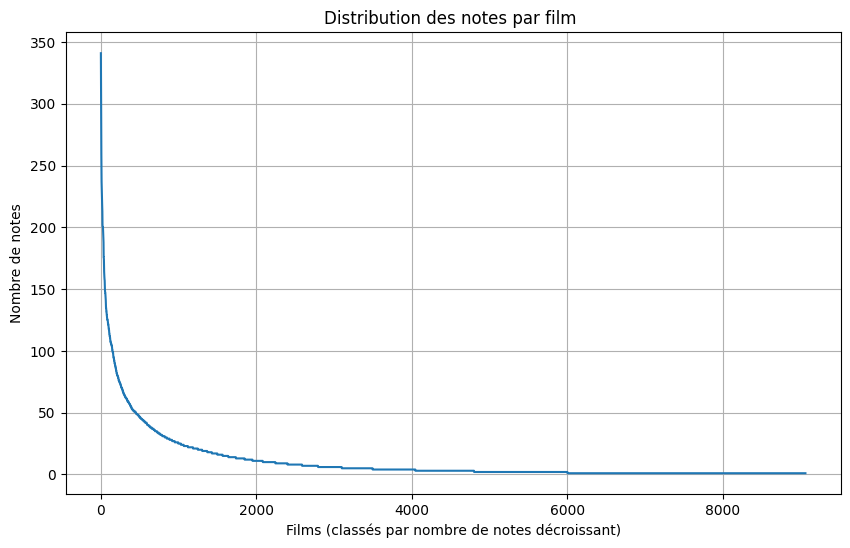

In [29]:
import matplotlib.pyplot as plt

# compte des notes par film
nb_Notes_film = df_ratings[C.ITEM_ID_COL].value_counts()

# Plot de la distribution (non triée par ID mais par popularité)
plt.figure(figsize=(10, 6))
plt.plot(nb_Notes_film.values)
plt.title("Distribution des notes par film ")
plt.xlabel("Films (classés par nombre de notes décroissant)")
plt.ylabel("Nombre de notes")
plt.grid()
plt.show()

# 4 - Ratings matrix sparsity

In [ ]:
# Nombre d'utilisateurs uniques
n_users = df_ratings[C.USER_ID_COL].nunique()

# Nombre de films uniques
n_movies = df_ratings[C.ITEM_ID_COL].nunique()

# Nombre total de notes
n_ratings = len(df_ratings)

# Calcul de la sparsity
sparsity = 1 - (n_ratings / (n_users * n_movies))
print(f"Sparsity Rating de la matrice de notations : {sparsity:.4f}")

Sparsity Rating de la matrice de notations : 0.9836


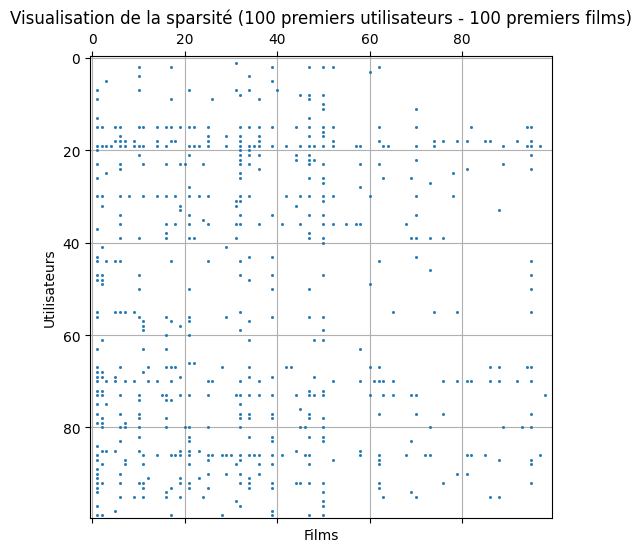

In [ ]:
from scipy.sparse import csr_matrix

# Création de la matrice utilisateur - film avec les ratings
matrice_sparse = csr_matrix((
    df_ratings[C.RATING_COL],
    (df_ratings[C.USER_ID_COL], df_ratings[C.ITEM_ID_COL])
))

import matplotlib.pyplot as plt

# On affiche un sous-ensemble 100x100 pour mieux voir
Sous_ensemble = matrice_sparse[:100, :100]

plt.figure(figsize=(6, 6))
plt.spy(Sous_ensemble, markersize=1)
plt.title("Visualisation de la sparsité (100 premiers utilisateurs - 100 premiers films)")
plt.xlabel("Films")
plt.ylabel("Utilisateurs")
plt.grid()
plt.show()
